In [1]:
%matplotlib inline

In [2]:
# Importing Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from scipy import stats

In [3]:
#Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading Files
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

In [5]:
#Reads the Mouse Drug Data
mouse_drug_df = pd.read_csv(mouse_drug_data)
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
# Reads the Clinical Trial Data
clinical_trial_df = pd.read_csv(clinical_trial_data)
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Combines the data into a single dataset
clinical_mouse_merged = pd.merge(clinical_trial_df, mouse_drug_df,on ="Mouse ID",how='outer')
# Displays the data table for preview
clinical_mouse_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [8]:
#Selects the merged drugs for later use in variable called "select_drugs_df"
select_drugs_df = clinical_mouse_merged.loc [(clinical_mouse_merged["Drug"] == "Capomulin") | (clinical_mouse_merged["Drug"] == "Ceftamin") | (clinical_mouse_merged["Drug"] == "Infubinol") | (clinical_mouse_merged["Drug"] == "Ketapril") | (clinical_mouse_merged["Drug"] == "Naftisol") |(clinical_mouse_merged["Drug"] == "Placebo") | (clinical_mouse_merged["Drug"] == "Propriva") | (clinical_mouse_merged["Drug"] == "Ramicane") | (clinical_mouse_merged["Drug"] == "Stelasyn") | (clinical_mouse_merged["Drug"] == "Zoniferol"), :]
select_drugs_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [9]:
# Stores the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_mean_tumor = select_drugs_df.groupby(['Drug','Timepoint'])

# Creates a DataFrame based on the column I would like to see
grouped_mean_tumor_df = pd.DataFrame(grouped_mean_tumor["Tumor Volume (mm3)"].sem())

# Displays created DataFrame
grouped_mean_tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [10]:
# Variables of every drug that store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint by locating them in their respective column indexed from their very first position
sterror_capomulin_df = grouped_mean_tumor_df.loc['Capomulin',["Tumor Volume (mm3)"]]
sterror_capomulin = sterror_capomulin_df.iloc[:, 0].values

sterror_ceftamin_df = grouped_mean_tumor_df.loc['Ceftamin',["Tumor Volume (mm3)"]]
sterror_ceftamin = sterror_ceftamin_df.iloc[:, 0].values

sterror_infubinol_df = grouped_mean_tumor_df.loc['Infubinol',["Tumor Volume (mm3)"]]
sterror_infubinol = sterror_infubinol_df.iloc[:, 0].values

sterror_ketapril_df = grouped_mean_tumor_df.loc['Ketapril',["Tumor Volume (mm3)"]]
sterror_ketapril = sterror_ketapril_df.iloc[:, 0].values

sterror_naftisol_df = grouped_mean_tumor_df.loc['Naftisol',["Tumor Volume (mm3)"]]
sterror_naftisol = sterror_naftisol_df.iloc[:, 0].values

sterror_placebo_df = grouped_mean_tumor_df.loc['Placebo',["Tumor Volume (mm3)"]]
sterror_placebo = sterror_placebo_df.iloc[:, 0].values

sterror_propriva_df = grouped_mean_tumor_df.loc['Propriva',["Tumor Volume (mm3)"]]
sterror_propriva = sterror_propriva_df.iloc[:, 0].values

sterror_ramicane_df = grouped_mean_tumor_df.loc['Ramicane',["Tumor Volume (mm3)"]]
sterror_ramicane = sterror_ramicane_df.iloc[:, 0].values

sterror_stelasyn_df = grouped_mean_tumor_df.loc['Stelasyn',["Tumor Volume (mm3)"]]
sterror_stelasyn = sterror_stelasyn_df.iloc[:, 0].values

sterror_zoniferol_df = grouped_mean_tumor_df.loc['Zoniferol',["Tumor Volume (mm3)"]]
sterror_zoniferol = sterror_zoniferol_df.iloc[:, 0].values

# Converts the merged/Grouped DataFrame into another DataFrame that calculates the mean of each drug stored from the Grouped DataFrame 
tumor_avg_df = pd.DataFrame(grouped_mean_tumor["Tumor Volume (mm3)"].mean())
tumor_avg_df.reset_index(inplace = True)

# This Previews DataFrame
tumor_avg_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [11]:
# Created Variables that locate the "Drugs" in the previously created DataFrame called "tumor_avg_df" and renames the columns  
reform_capomulin_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Capomulin",:]
reform_capomulin_renamed_df = reform_capomulin_df.rename(columns={"Tumor Volume (mm3)":"Capomulin"})

reform_ceftamin_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Ceftamin",:]
reform_ceftamin_renamed_df = reform_ceftamin_df.rename(columns={"Tumor Volume (mm3)":"Ceftamin"})

reform_infubinol_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Infubinol",:]
reform_infubinol_renamed_df = reform_infubinol_df.rename(columns={"Tumor Volume (mm3)":"Infubinol"})

reform_ketapril_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Ketapril",:]
reform_ketapril_renamed_df = reform_ketapril_df.rename(columns={"Tumor Volume (mm3)":"Ketapril"})

reform_naftisol_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Naftisol",:]
reform_naftisol_renamed_df = reform_naftisol_df.rename(columns={"Tumor Volume (mm3)":"Naftisol"})

reform_placebo_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Placebo",:]
reform_placebo_renamed_df = reform_placebo_df.rename(columns={"Tumor Volume (mm3)":"Placebo"})

reform_propriva_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Propriva",:]
reform_propriva_renamed_df = reform_propriva_df.rename(columns={"Tumor Volume (mm3)":"Propriva"})

reform_ramicane_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Ramicane",:]
reform_ramicane_renamed_df = reform_ramicane_df.rename(columns={"Tumor Volume (mm3)":"Ramicane"})

reform_stelasyn_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Stelasyn",:]
reform_stelasyn_renamed_df = reform_stelasyn_df.rename(columns={"Tumor Volume (mm3)":"Stelasyn"})

reform_zoniferol_df = tumor_avg_df.loc[tumor_avg_df["Drug"]=="Zoniferol",:]
reform_zoniferol_renamed_df = reform_zoniferol_df.rename(columns={"Tumor Volume (mm3)":"Zoniferol"})

#Variables that merge all of the previous Data into one large DataFrame relative to the timepoint of the data
first_merge_df=pd.merge(reform_capomulin_renamed_df, reform_ceftamin_renamed_df, on="Timepoint")
second_merge_df=pd.merge(first_merge_df, reform_infubinol_renamed_df, on="Timepoint")
third_merge_df=pd.merge(second_merge_df, reform_ketapril_renamed_df, on="Timepoint")
fourth_merge_df=pd.merge(third_merge_df, reform_naftisol_renamed_df, on="Timepoint")
fifth_merge_df=pd.merge(fourth_merge_df, reform_placebo_renamed_df, on="Timepoint")
sixth_merge_df=pd.merge(fifth_merge_df, reform_propriva_renamed_df, on="Timepoint")
seventh_merge_df=pd.merge(sixth_merge_df, reform_ramicane_renamed_df, on="Timepoint")
eighth_merge_df=pd.merge(seventh_merge_df, reform_stelasyn_renamed_df, on="Timepoint")
ninth_merge_df=pd.merge(eighth_merge_df, reform_zoniferol_renamed_df, on="Timepoint")

#Creates the final DataFrame to use for this portion and drops the excess columns
ninth_merge_drop_df = ninth_merge_df.drop(["Drug_x","Drug_y"],axis=1)
ninth_merge_drop_df.head()

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


NameError: name 'ax' is not defined

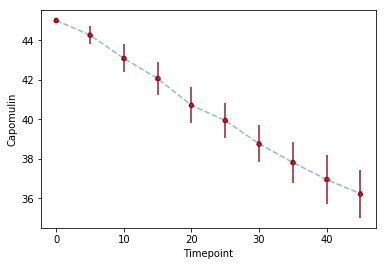

In [12]:
#Variable holding the respective columns of drugs to be used too convert values to floats
tumor_treatment_df = ninth_merge_drop_df[["Timepoint", "Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn","Zoniferol"]]
tumor_treatment_df

#Converts the values in the DataFrame to Float types 
tumor_treatment_df['Timepoint'] = tumor_treatment_df['Timepoint'].astype(float)
tumor_treatment_df.dtypes

#Plotting four drug type values into a scatter plot along with formatting, lines, colors, errors, etc.
axis=tumor_treatment_df.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o', yerr=sterror_capomulin);
axis.errorbar(x=tumor_treatment_df['Timepoint'],y=tumor_treatment_df['Capomulin'], yerr=sterror_capomulin, fmt='o', mfc='r', mec='k', ms=4, mew=1, linestyle='--',alpha=0.5, label="Capomulin" )

tumor_treatment_df.plot(kind='scatter', x='Timepoint', y='Infubinol', linestyle='--', color='DarkGreen', marker='^', yerr = sterror_infubinol, ax=ax);
axis.errorbar(x=tumor_treatment_df['Timepoint'],y=tumor_treatment_df['Infubinol'], yerr=sterror_infubinol, fmt='^', mfc='b', mec='k', ms=4, mew=1, linestyle='--', alpha=0.5, label="Infubinol")

tumor_treatment_df.plot(kind='scatter', x='Timepoint', y='Ketapril', linestyle='--', color='blue', marker='s',  yerr = sterror_ketapril,  ax=ax);
axis.errorbar(x=tumor_treatment_df['Timepoint'],y=tumor_treatment_df['Ketapril'], yerr=sterror_ketapril, fmt='s', mfc='g', mec='k', ms=4, mew=1, linestyle='--', alpha=0.5, label="Ketapril")

tumor_treatment_df.plot(kind='scatter', x='Timepoint', y='Placebo', linestyle='--', color='black', marker='d',  yerr = sterror_placebo,  ax=ax);
axis.errorbar(x=tumor_treatment_df['Timepoint'],y=tumor_treatment_df['Placebo'], yerr=sterror_placebo, fmt='d', mfc='b', mec='k', ms=4, mew=1, linestyle='--', alpha=0.5, label="Placebo")

# Setting Graph info such as limits, grids, labels, legend, etc.
plt.xlim(-5,50)
plt.ylim(33,75)
axis.grid()
axis.set_xlabel("Time (Days)")
axis.set_ylabel("Tumor Volume (mm3)")
axis.set_title("Tumor Response To Treatment")
legend = axis.legend(loc='best', shadow=True)
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles, labels )

# Output variable that saves the figure as a png"
plt.savefig("Tumor_Response_To_Treatment.png")

# Displays the Result
plt.show()

## Metastatic Response to Treatment

In [13]:
# Stores the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_grouped_response = select_drugs_df.groupby(['Drug','Timepoint'])

# Creates a DataFrame based on the column I would like to see
meta_grouped_response_df = pd.DataFrame(meta_grouped_response["Metastatic Sites"].mean())

# Displays created DataFrame
meta_grouped_response_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [14]:
# Variables of every drug that store the Standard Error of Met. Sites Grouped by Drug and Timepoint by locating them in their respective column indexed from their very first position
sterror_capomulin_df_1 = meta_grouped_response_df.loc['Capomulin',["Metastatic Sites"]]
sterror_capomulin_1 = sterror_capomulin_df_1.iloc[:, 0].values

sterror_ceftamin_df_1 = meta_grouped_response_df.loc['Ceftamin',["Metastatic Sites"]]
sterror_ceftamin_1 = sterror_ceftamin_df_1.iloc[:, 0].values

sterror_infubinol_df_1 = meta_grouped_response_df.loc['Infubinol',["Metastatic Sites"]]
sterror_infubinol_1 = sterror_infubinol_df_1.iloc[:, 0].values

sterror_ketapril_df_1 = meta_grouped_response_df.loc['Ketapril',["Metastatic Sites"]]
sterror_ketapril_1 = sterror_ketapril_df_1.iloc[:, 0].values

sterror_naftisol_df_1 = meta_grouped_response_df.loc['Naftisol',["Metastatic Sites"]]
sterror_naftisol_1 = sterror_naftisol_df_1.iloc[:, 0].values

sterror_placebo_df_1 = meta_grouped_response_df.loc['Placebo',["Metastatic Sites"]]
sterror_placebo_1 = sterror_placebo_df_1.iloc[:, 0].values

sterror_propriva_df_1 = meta_grouped_response_df.loc['Propriva',["Metastatic Sites"]]
sterror_propriva_1 = sterror_propriva_df_1.iloc[:, 0].values

sterror_ramicane_df_1 = meta_grouped_response_df.loc['Ramicane',["Metastatic Sites"]]
sterror_ramicane_1 = sterror_ramicane_df_1.iloc[:, 0].values

sterror_stelasyn_df_1 = meta_grouped_response_df.loc['Stelasyn',["Metastatic Sites"]]
sterror_stelasyn_1 = sterror_stelasyn_df_1.iloc[:, 0].values

sterror_zoniferol_df_1 = meta_grouped_response_df.loc['Zoniferol',["Metastatic Sites"]]
sterror_zoniferol_1 = sterror_zoniferol_df_1.iloc[:, 0].values

# Converts the merged/Grouped DataFrame into another DataFrame that calculates the mean of each drug stored from the Grouped DataFrame
meta_avg_df = pd.DataFrame(meta_grouped_response["Metastatic Sites"].mean())
meta_avg_df.reset_index(inplace = True)

# This Previews DataFrame
meta_avg_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [15]:
# Created Variables that locate the "Drugs" in the previously created DataFrame called "meta_avg_df" and renames the columns 
reform_capomulin_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Capomulin",:]
reform_capomulin_renamed_df_1 = reform_capomulin_df_1.rename(columns={"Metastatic Sites":"Capomulin"})

reform_ceftamin_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Ceftamin",:]
reform_ceftamin_renamed_df_1 = reform_ceftamin_df_1.rename(columns={"Metastatic Sites":"Ceftamin"})

reform_infubinol_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Infubinol",:]
reform_infubinol_renamed_df_1 = reform_infubinol_df_1.rename(columns={"Metastatic Sites":"Infubinol"})

reform_ketapril_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Ketapril",:]
reform_ketapril_renamed_df_1 = reform_ketapril_df_1.rename(columns={"Metastatic Sites":"Ketapril"})

reform_naftisol_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Naftisol",:]
reform_naftisol_renamed_df_1 = reform_naftisol_df_1.rename(columns={"Metastatic Sites":"Naftisol"})

reform_placebo_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Placebo",:]
reform_placebo_renamed_df_1 = reform_placebo_df_1.rename(columns={"Metastatic Sites":"Placebo"})

reform_propriva_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Propriva",:]
reform_propriva_renamed_df_1 = reform_propriva_df_1.rename(columns={"Metastatic Sites":"Propriva"})

reform_ramicane_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Ramicane",:]
reform_ramicane_renamed_df_1 = reform_ramicane_df_1.rename(columns={"Metastatic Sites":"Ramicane"})

reform_stelasyn_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Stelasyn",:]
reform_stelasyn_renamed_df_1 = reform_stelasyn_df_1.rename(columns={"Metastatic Sites":"Stelasyn"})

reform_zoniferol_df_1 = meta_avg_df.loc[meta_avg_df["Drug"]=="Zoniferol",:]
reform_zoniferol_renamed_df_1 = reform_zoniferol_df_1.rename(columns={"Metastatic Sites":"Zoniferol"})

#Variables that merge all of the previous Data into one large DataFrame relative to the timepoint of the data
first_merge_df_1=pd.merge(reform_capomulin_renamed_df_1, reform_ceftamin_renamed_df_1, on="Timepoint")
second_merge_df_1=pd.merge(first_merge_df_1, reform_infubinol_renamed_df_1, on="Timepoint")
third_merge_df_1=pd.merge(second_merge_df_1, reform_ketapril_renamed_df_1, on="Timepoint")
fourth_merge_df_1=pd.merge(third_merge_df_1, reform_naftisol_renamed_df_1, on="Timepoint")
fifth_merge_df_1=pd.merge(fourth_merge_df_1, reform_placebo_renamed_df_1, on="Timepoint")
sixth_merge_df_1=pd.merge(fifth_merge_df_1, reform_propriva_renamed_df_1, on="Timepoint")
seventh_merge_df_1=pd.merge(sixth_merge_df_1, reform_ramicane_renamed_df_1, on="Timepoint")
eighth_merge_df_1=pd.merge(seventh_merge_df_1, reform_stelasyn_renamed_df_1, on="Timepoint")
ninth_merge_df_1=pd.merge(eighth_merge_df_1, reform_zoniferol_renamed_df_1, on="Timepoint")

# Creates the final DataFrame to use for this portion and drops the excess columns
ninth_merge_drop_df_1 = ninth_merge_df_1.drop(["Drug_x","Drug_y"],axis=1)

# Previews that Reformatting worked
ninth_merge_drop_df_1.head()

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


NameError: name 'ax' is not defined

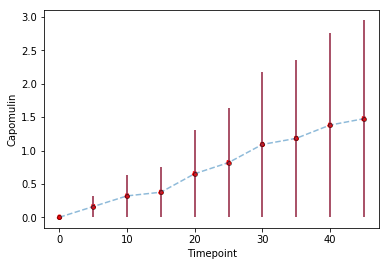

In [16]:
# Variable holding the respective columns of drugs to be used too convert values to floats
meta_treatment_df = ninth_merge_drop_df_1[["Timepoint", "Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn","Zoniferol"]]
meta_treatment_df

# Converts the values in the DataFrame to Float types 
meta_treatment_df['Timepoint'] = meta_treatment_df['Timepoint'].astype(float)
meta_treatment_df.dtypes

# Plotting four drug type values into a scatter plot along with formatting, lines, colors, errors, etc.
axis=meta_treatment_df.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o', yerr=sterror_capomulin_1);
axis.errorbar(x=meta_treatment_df['Timepoint'],y=meta_treatment_df['Capomulin'], yerr=sterror_capomulin_1, fmt='o', mfc='r', mec='k', ms=4, mew=1, linestyle='--',alpha=0.5, label="Capomulin" )

meta_treatment_df.plot(kind='scatter', x='Timepoint', y='Infubinol', linestyle='--', color='DarkGreen', marker='^', yerr = sterror_infubinol_1, ax=ax);
axis.errorbar(x=meta_treatment_df['Timepoint'],y=meta_treatment_df['Infubinol'], yerr=sterror_infubinol_1, fmt='^', mfc='b', mec='k', ms=4, mew=1, linestyle='--', alpha=0.5, label="Infubinol")

meta_treatment_df.plot(kind='scatter', x='Timepoint', y='Ketapril', linestyle='--', color='blue', marker='s',  yerr = sterror_ketapril_1,  ax=ax);
axis.errorbar(x=meta_treatment_df['Timepoint'],y=meta_treatment_df['Ketapril'], yerr=sterror_ketapril_1, fmt='s', mfc='g', mec='k', ms=4, mew=1, linestyle='--', alpha=0.5, label="Ketapril")

meta_treatment_df.plot(kind='scatter', x='Timepoint', y='Placebo', linestyle='--', color='black', marker='d',  yerr = sterror_placebo_1,  ax=ax);
axis.errorbar(x=meta_treatment_df['Timepoint'],y=meta_treatment_df['Placebo'], yerr=sterror_placebo_1, fmt='d', mfc='b', mec='k', ms=4, mew=1, linestyle='--', alpha=0.5, label="Placebo")

# Setting Graph info such as limits, grids, labels, legend, etc.
plt.xlim(-5,50)
plt.ylim(-.5,7)
axis.grid()
axis.set_xlabel("Treatment Duration (Days)")
axis.set_ylabel("Met. Sites")
axis.set_title("Metatastic Spread During Treatment")
legend = axis.legend(loc='best', shadow=True)
handles, labels = axis.get_legend_handles_labels()
axis.legend(handles, labels )

# Output variable that saves the figure as a png"
plt.savefig("Metastatic_Spread_During_Treatment.png")

# Displays the Result
plt.show()

## Survival Rates

In [17]:
# Stores the Count of Mice on Mouse ID
mice_count_df=pd.DataFrame(grouped_mean_tumor["Mouse ID"].count())

# Creates a DataFrame based on the column I would like to see, renames it, and keeps index title
mice_count_renamed_df= mice_count_df.rename(columns={"Mouse ID":"Mouse Count"})
mice_count_renamed_df.reset_index(inplace=True)

# Displays created DataFrame
mice_count_renamed_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Created Variables that locate the "Drugs" in the previously created DataFrame called "mice_count_renamed_df" and renames the columns
reform_capomulin_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Capomulin",:]
reform_capomulin_renamed_df_2 = reform_capomulin_df_2.rename(columns={"Mouse Count":"Capomulin"})

reform_ceftamin_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Ceftamin",:]
reform_ceftamin_renamed_df_2 = reform_ceftamin_df_2.rename(columns={"Mouse Count":"Ceftamin"})

reform_infubinol_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Infubinol",:]
reform_infubinol_renamed_df_2 = reform_infubinol_df_2.rename(columns={"Mouse Count":"Infubinol"})

reform_ketapril_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Ketapril",:]
reform_ketapril_renamed_df_2 = reform_ketapril_df_2.rename(columns={"Mouse Count":"Ketapril"})

reform_naftisol_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Naftisol",:]
reform_naftisol_renamed_df_2 = reform_naftisol_df_2.rename(columns={"Mouse Count":"Naftisol"})

reform_placebo_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Placebo",:]
reform_placebo_renamed_df_2 = reform_placebo_df_2.rename(columns={"Mouse Count":"Placebo"})

reform_propriva_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Propriva",:]
reform_propriva_renamed_df_2 = reform_propriva_df_2.rename(columns={"Mouse Count":"Propriva"})

reform_ramicane_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Ramicane",:]
reform_ramicane_renamed_df_2 = reform_ramicane_df_2.rename(columns={"Mouse Count":"Ramicane"})

reform_stelasyn_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Stelasyn",:]
reform_stelasyn_renamed_df_2 = reform_stelasyn_df_2.rename(columns={"Mouse Count":"Stelasyn"})

reform_zoniferol_df_2 = mice_count_renamed_df.loc[mice_count_renamed_df["Drug"]=="Zoniferol",:]
reform_zoniferol_renamed_df_2 = reform_zoniferol_df_2.rename(columns={"Mouse Count":"Zoniferol"})

#Variables that merge all of the previous Data into one large DataFrame relative to the timepoint of the data
first_merge_df_2=pd.merge(reform_capomulin_renamed_df_2, reform_ceftamin_renamed_df_2, on="Timepoint")
second_merge_df_2=pd.merge(first_merge_df_2, reform_infubinol_renamed_df_2, on="Timepoint")
third_merge_df_2=pd.merge(second_merge_df_2, reform_ketapril_renamed_df_2, on="Timepoint")
fourth_merge_df_2=pd.merge(third_merge_df_2, reform_naftisol_renamed_df_2, on="Timepoint")
fifth_merge_df_2=pd.merge(fourth_merge_df_2, reform_placebo_renamed_df_2, on="Timepoint")
sixth_merge_df_2=pd.merge(fifth_merge_df_2, reform_propriva_renamed_df_2, on="Timepoint")
seventh_merge_df_2=pd.merge(sixth_merge_df_2, reform_ramicane_renamed_df_2, on="Timepoint")
eighth_merge_df_2=pd.merge(seventh_merge_df_2, reform_stelasyn_renamed_df_2, on="Timepoint")
ninth_merge_df_2=pd.merge(eighth_merge_df_2, reform_zoniferol_renamed_df_2, on="Timepoint")

# Creates the final DataFrame to use for this portion and drops the excess columns
ninth_merge_drop_df_2 = ninth_merge_df_2.drop(["Drug_x","Drug_y"],axis=1)
# Preview that Reformatting worked
ninth_merge_drop_df_2.head()

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [19]:
# Converts the values in the DataFrame to Float types 
ninth_merge_drop_df_2 = ninth_merge_drop_df_2.astype(float)
ninth_merge_drop_df_2.dtypes

# Creates Columns that add values using a formula that calculates the percentages of four selected drugs 
ninth_merge_drop_df_2["Capomulin Percent"]=ninth_merge_drop_df_2["Capomulin"]/ninth_merge_drop_df_2["Capomulin"].iloc[0] * 100
ninth_merge_drop_df_2["Infubinol Percent"]=ninth_merge_drop_df_2["Infubinol"]/ninth_merge_drop_df_2["Infubinol"].iloc[0] * 100
ninth_merge_drop_df_2["Ketapril Percent"]=ninth_merge_drop_df_2["Ketapril"]/ninth_merge_drop_df_2["Ketapril"].iloc[0] * 100
ninth_merge_drop_df_2["Placebo Percent"]=ninth_merge_drop_df_2["Placebo"]/ninth_merge_drop_df_2["Placebo"].iloc[0] * 100

# Shows the percentages at the end of the DataFrame
ninth_merge_drop_df_2.head()

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol,Capomulin Percent,Infubinol Percent,Ketapril Percent,Placebo Percent
0,0.0,25.0,25.0,25.0,25.0,25.0,25.0,26.0,25.0,26.0,25.0,100.0,100.0,100.0,100.0
1,5.0,25.0,21.0,25.0,23.0,23.0,24.0,25.0,25.0,25.0,24.0,100.0,100.0,92.0,96.0
2,10.0,25.0,20.0,21.0,22.0,21.0,24.0,23.0,24.0,23.0,22.0,100.0,84.0,88.0,96.0
3,15.0,24.0,19.0,21.0,19.0,21.0,20.0,17.0,24.0,23.0,21.0,96.0,84.0,76.0,80.0
4,20.0,23.0,18.0,20.0,19.0,20.0,19.0,17.0,23.0,21.0,17.0,92.0,80.0,76.0,76.0


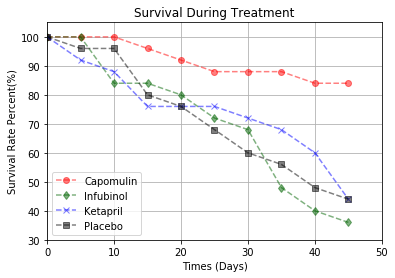

In [20]:
# Generate the Plot (Accounting for percentages)
ax=ninth_merge_drop_df_2.plot(kind='line', x='Timepoint',y='Capomulin Percent', linestyle='--', color='red', marker='o', alpha=0.5, label="Capomulin");
ninth_merge_drop_df_2.plot(kind='line', x='Timepoint', y='Infubinol Percent', linestyle='--', color='DarkGreen', marker='d', ax=ax, alpha=0.5, label="Infubinol");
ninth_merge_drop_df_2.plot(kind='line', x='Timepoint', y='Ketapril Percent', linestyle='--', color='blue', marker='x',  ax=ax,  alpha=0.5, label="Ketapril");
ninth_merge_drop_df_2.plot(kind='line', x='Timepoint', y='Placebo Percent', linestyle='--', color='black', marker='s', ax=ax,  alpha=0.5, label="Placebo");

# Setting Graph info such as limits, grids, labels, legend, etc.
ax.set_xlim(0, 50, 5)
ax.set_ylim(30, 105)
ax.grid()
ax.set_xlabel("Times (Days)")
ax.set_ylabel("Survival Rate Percent(%)")
ax.set_title("Survival During Treatment")
legend = ax.legend(loc='best', shadow=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels )

# Output variable that saves the figure as a png"
plt.savefig("Survival_During_Treatment.png")

# Displays the Result
plt.show()

## Summary Bar Graph

In [21]:
# Variables to calculate percent changes for four specific drugs
capomulin_percent_change=(ninth_merge_drop_df["Capomulin"].iloc[9]-ninth_merge_drop_df["Capomulin"].iloc[0])/ninth_merge_drop_df["Capomulin"].iloc[0]*100
infubinol_percent_change=(ninth_merge_drop_df["Infubinol"].iloc[9]-ninth_merge_drop_df["Infubinol"].iloc[0])/ninth_merge_drop_df["Infubinol"].iloc[0]*100
ketapril_percent_change=(ninth_merge_drop_df["Ketapril"].iloc[9]-ninth_merge_drop_df["Ketapril"].iloc[0])/ninth_merge_drop_df["Ketapril"].iloc[0]*100
placebo_percent_change=(ninth_merge_drop_df["Placebo"].iloc[9]-ninth_merge_drop_df["Placebo"].iloc[0])/ninth_merge_drop_df["Placebo"].iloc[0]*100

# Variable that creates a dictionary that holds the calculated percentages and places them in a dictionary
p_data = {'Capomulin': capomulin_percent_change, 'Infubinol': infubinol_percent_change, 'Ketapril': ketapril_percent_change, 'Placebo': placebo_percent_change}
total_percent_change = pd.Series(p_data)

# Displays the dictionary results
total_percent_change

Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

In [22]:
# Returns a view object that displays a list of all the keys in the dictionary
p_data_drug = total_percent_change.keys()
p_data_drug

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object')

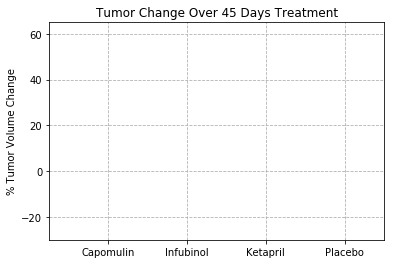

In [31]:
# Last part won't seem to run...I'm not sure why?
x_spot = plt.subplot()
x_axis = np.arange(0, len(p_data_drug))
tick_locations = []
for x_spot in x_axis:
    tick_locations.append(x_spot + 0.5)

plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")

plt.xlim(-0.25, len(p_data_drug))
plt.ylim(-30, 65)

plt.grid(True, linestyle='dashed')
plt.xticks(tick_locations, p_data_drug)

width = 0.4
vals = [1,2,3,4,5]
colors = ['r','b','b','b','b']

colors = []

for n in total_percent_change:
    if n >= 0 :
        colors.append('r')
    else:
        colors.append('g')
percents=ax.bar(x_axis, total_percent_change, color=colors, alpha=0.75, align="edge")

# Using Auto Label function to help display negative values
# https://stackoverflow.com/questions/45177937/how-can-i-adapt-the-autolabel-function-in-matplotlib-so-that-it-displays-negativ
def autolabel(percents, ax):
    (bottom, top) = ax.get_ylim()
    y_height = top - bottom
    for percent in percents:
        height = percent.get_height()       
        ax.text(percent.get_x()+ percent.get_width()/2., 0.5*height, '%d' % int(height) +"%", ha='center', va='center')
autolabel(percents, ax)

plt.savefig("Tumor_Change_Over_45_Days_Treatment.png")
plt.show()

# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figure
# Show the Figure
#fig.show()